Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


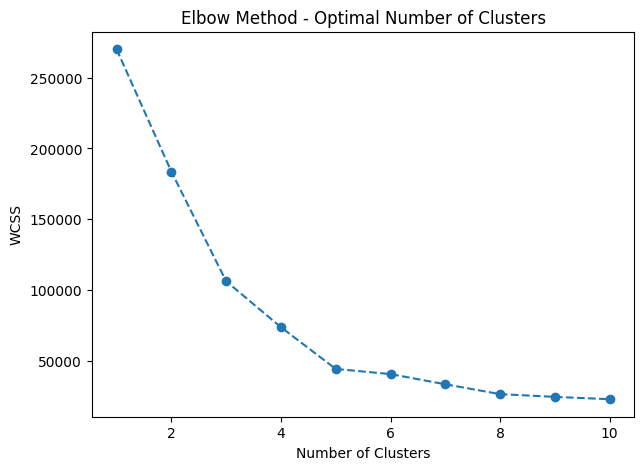

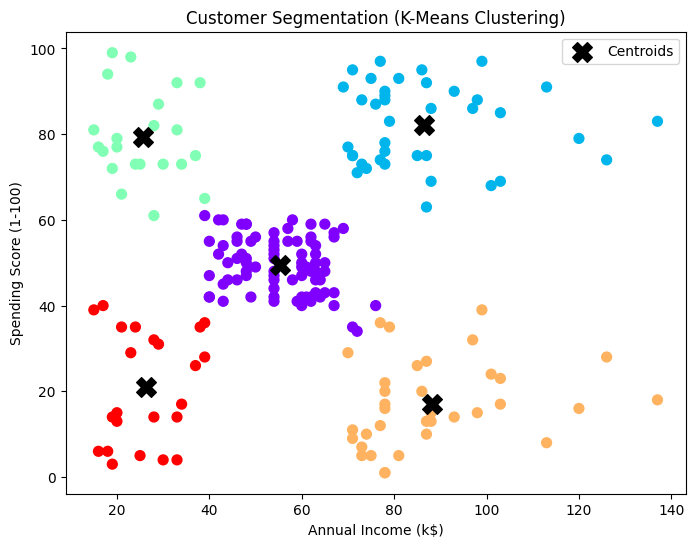


=== Cluster Centers ===
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043

=== Number of Customers in Each Cluster ===
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [1]:
# -----------------------------------------
# Customer Segmentation using K-Means Clustering
# -----------------------------------------

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# -----------------------------------------
# STEP 1: Load the dataset
# -----------------------------------------
df = pd.read_csv("Mall_Customers.csv")

print("Dataset Preview:")
print(df.head())

# -----------------------------------------
# STEP 2: Select relevant features
# We'll use Annual Income and Spending Score
# -----------------------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# -----------------------------------------
# STEP 3: Find optimal number of clusters using Elbow Method
# -----------------------------------------
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# -----------------------------------------
# STEP 4: Apply K-Means with optimal clusters
# From elbow method, let's assume k=5
# -----------------------------------------
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# -----------------------------------------
# STEP 5: Visualize the clusters
# -----------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df['Cluster'], cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=200, c='black', label='Centroids', marker='X')
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# -----------------------------------------
# STEP 6: Analyze cluster groups
# -----------------------------------------
print("\n=== Cluster Centers ===")
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_centers)

print("\n=== Number of Customers in Each Cluster ===")
print(df['Cluster'].value_counts())
